Short Writeup:
<br> I wanted to play around with some text analytics and analyse LHL speech
<br> I wanted to compare LHL speech with speeches from Opposition (LTK) to see how similar or different they are

Install all these packages

In [1]:
#!pip install gensim

In [2]:
import numpy as np
import pandas as pd
import collections
import re
import nltk

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Annabel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Annabel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Open the speech text file

In [5]:
filename = "lhlspeech.txt"
#2012 LHL National Rally Day Speech"

In [6]:
df = open(filename,"r")

In [7]:
text = df.read()

In [8]:
print text

We have travelled from Third World to First. You know the Singapore story to date well. Our
question is what is the next chapter of this story? Where do we want Singapore to be 20 years
from now?
The next 20 years will see many changes in the world. The first big question will be: will there be
peace or instability in the world, and in Asia? If it is not peaceful, if there are tensions, then we
must brace ourselves for a rough ride. But if there is peace and prosperity worldwide, which
looks likely, then it is going to be an exciting era of rapid progress and dramatic change.
We are both a country and a city. So when we look forward into our future, we have to see our
future against what other countries are doing and also against what other cities are doing in the
world. In Asia, I expect many countries will continue to rise and especially the biggest ones -
China and India. And they will compete against us in many business areas - manufacturing,
services. R&D and in some areas they wi

Create word tokens, in lower cases

In [9]:
words = text.split()
lower_words = [w.lower() for w in words] #tokenize words in lower case
print lower_words

['we', 'have', 'travelled', 'from', 'third', 'world', 'to', 'first.', 'you', 'know', 'the', 'singapore', 'story', 'to', 'date', 'well.', 'our', 'question', 'is', 'what', 'is', 'the', 'next', 'chapter', 'of', 'this', 'story?', 'where', 'do', 'we', 'want', 'singapore', 'to', 'be', '20', 'years', 'from', 'now?', 'the', 'next', '20', 'years', 'will', 'see', 'many', 'changes', 'in', 'the', 'world.', 'the', 'first', 'big', 'question', 'will', 'be:', 'will', 'there', 'be', 'peace', 'or', 'instability', 'in', 'the', 'world,', 'and', 'in', 'asia?', 'if', 'it', 'is', 'not', 'peaceful,', 'if', 'there', 'are', 'tensions,', 'then', 'we', 'must', 'brace', 'ourselves', 'for', 'a', 'rough', 'ride.', 'but', 'if', 'there', 'is', 'peace', 'and', 'prosperity', 'worldwide,', 'which', 'looks', 'likely,', 'then', 'it', 'is', 'going', 'to', 'be', 'an', 'exciting', 'era', 'of', 'rapid', 'progress', 'and', 'dramatic', 'change.', 'we', 'are', 'both', 'a', 'country', 'and', 'a', 'city.', 'so', 'when', 'we', 'look

Preprocessing work:
1. Remove stop words and common words
2. Remove punctuations and numbers
3. Convert words to roots using Lemmatize

In [10]:
# preprocessing work
#1. Remove stopwords and common words such as Singapore etc

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

tokens = [w for w in lower_words if w.isalpha()] #this step removes punctuations and numbers
#print tokens
#tokens = [w for w in word_tokenize(lower_words) if w.isalpha()]
swords = stopwords.words("english") + ["singapore","nation","country","singaporean","singapura","something","singaporeans","government","people"]
    
no_stopwords = [w for w in tokens if w not in swords]
print no_stopwords

['travelled', 'third', 'world', 'know', 'story', 'date', 'question', 'next', 'chapter', 'want', 'years', 'next', 'years', 'see', 'many', 'changes', 'first', 'big', 'question', 'peace', 'instability', 'must', 'brace', 'rough', 'peace', 'prosperity', 'looks', 'going', 'exciting', 'era', 'rapid', 'progress', 'dramatic', 'look', 'forward', 'see', 'future', 'countries', 'also', 'cities', 'expect', 'many', 'countries', 'continue', 'rise', 'especially', 'biggest', 'ones', 'china', 'compete', 'us', 'many', 'business', 'areas', 'areas', 'surpass', 'us', 'parts', 'china', 'india', 'certainly', 'surpass', 'big', 'giants', 'offer', 'many', 'opportunities', 'bangalore', 'become', 'even', 'vibrant', 'exciting', 'places', 'live', 'already', 'quite', 'quite', 'clean', 'environmentally', 'improve', 'pleasant', 'developed', 'countries', 'change', 'may', 'dramatic', 'problems', 'also', 'easy', 'like', 'problems', 'europeans', 'going', 'leading', 'like', 'new', 'los', 'believe', 'continue', 'thrive', 'con

Need to convert the list to string
<br> Lemmma function can only take in strings

In [11]:
#get str out of list for pre-processing step 2 (create lemma)
str1 = ' '.join(no_stopwords)
print str1

travelled third world know story date question next chapter want years next years see many changes first big question peace instability must brace rough peace prosperity looks going exciting era rapid progress dramatic look forward see future countries also cities expect many countries continue rise especially biggest ones china compete us many business areas areas surpass us parts china india certainly surpass big giants offer many opportunities bangalore become even vibrant exciting places live already quite quite clean environmentally improve pleasant developed countries change may dramatic problems also easy like problems europeans going leading like new los believe continue thrive connected countries problems connected whole talent flows resources flow ideas come new new companies start new changes influence see cities ask us want one big changes world change world completely transform already huge part work always realise ask room please put hand one know think years ago lifetime

Create function to check if stepwords are present from this step and beyond

In [12]:
#create function to check if stepwords are present
def x(z,y):
    if z in y:
        print True
    else:
        print False

In [13]:
x("singaporeans",no_stopwords)

False


Convert all words to root words
<br> Remove words that have 4 letters or  less

In [14]:
#step 2 to remove lemmas
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
lemma = wordnet_lemmatizer.lemmatize(str1)
import re
#get rid of words 5 letters or less 
#print final_clean
final_clean = (re.sub(r'\b\w{1,5}\b', '', lemma)).split()
type(final_clean)
#print final_clean

list

Create a bag of words (dictionary)
<br> {word_token : word_frequency}

In [15]:
#create bag of words dictionary
from collections import Counter
bow = Counter(final_clean)
print bow

Counter({'students': 25, 'social': 23, 'children': 17, 'cannot': 15, 'school': 14, 'better': 14, 'especially': 12, 'please': 12, 'another': 12, 'things': 11, 'together': 11, 'family': 10, 'primary': 10, 'become': 10, 'housing': 10, 'called': 10, 'education': 10, 'picture': 10, 'preschool': 9, 'university': 9, 'already': 9, 'countries': 9, 'recently': 9, 'different': 9, 'places': 9, 'others': 9, 'opportunities': 8, 'international': 8, 'national': 8, 'future': 8, 'competition': 8, 'memories': 8, 'certain': 8, 'always': 7, 'support': 7, 'little': 7, 'shared': 7, 'husband': 7, 'improve': 7, 'around': 7, 'spending': 7, 'changes': 6, 'making': 6, 'reserves': 6, 'course': 6, 'unisim': 6, 'generation': 6, 'imagine': 6, 'talked': 6, 'quality': 6, 'alfred': 6, 'learning': 6, 'families': 6, 'anchor': 6, 'parents': 6, 'income': 6, 'operators': 6, 'problems': 6, 'natalie': 6, 'encourage': 5, 'working': 5, 'provide': 5, 'somebody': 5, 'society': 5, 'beyond': 5, 'sometimes': 5, 'married': 5, 'enough'

In [16]:
x("singaporeans",bow)

False


Create wordcloud to show the most common words in LHL's speech
<br> Limitations:
    1. Cannot understand contextual meaning
    2. Cannot see the topic
    3. Cannot pick up "sarcasm" or words with double meaning or colloquial language 

In [17]:
#create word cloud to show common words
from wordcloud import WordCloud
wc = WordCloud().generate_from_frequencies(bow)
print wc

In [18]:
import matplotlib.pyplot as plt
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

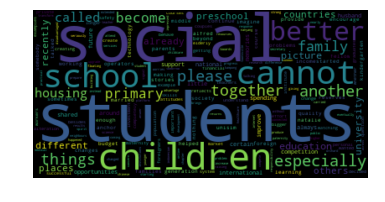

In [19]:
plt.show()